## ejercicios de cuestionario 5

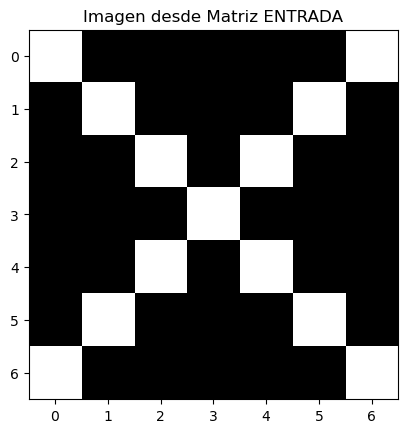

In [5]:
import numpy as np
import matplotlib.pyplot as plt

ENTRADA = np.array([ 

          [1,0,0,0,0,0,1],

          [0,1,0,0,0,1,0],

          [0,0,1,0,1,0,0],

          [0,0,0,1,0,0,0],

          [0,0,1,0,1,0,0],

          [0,1,0,0,0,1,0],

          [1,0,0,0,0,0,1]])

# Dimensiones de la imagen
img_alto, img_ancho = ENTRADA.shape
 

Kernel1 = np.array([ [ 0,-1, 0],
                     [-1, 1,-1],
                     [ 0,-1, 0]])

 

Kernel2 = np.array([ [ 0, 0, 0],
                     [ 0, 1, 0],
                     [ 0, 0, 0]])

# Mostrar la imagen
plt.imshow(ENTRADA, cmap='gray')
plt.title('Imagen desde Matriz ENTRADA')
plt.show()

### Valores de filtros


In [100]:
#valores para el Kernel1
K1 = Kernel1.shape[0]  #tamaño del kernel
S1 = 1 # stride
P1 = 'same' # 'same' agrega padding 1, 'valid' no agrega padding  

#valores para el Kernel2
K2 = Kernel2.shape[0]  #tamaño del kernel
S2 = 1 # stride
P2 = 'same' # 'same' agrega padding 1, 'valid' no agrega padding  

### Definir modelos Sequiential con una capa convolucional

In [103]:
from keras.models import Sequential
from keras.layers import Conv2D

# MODELO 1
model1 = Sequential()
# Añadir la capa convolucional al modelo
# La capa tendrá 1 filtro (kernel) de tamaño 3x3, con padding P=1 y con stride de 1
model1.add(Conv2D(1, (K1,K1), strides=(S1,S1), padding=P1, 
                 input_shape=(img_alto, img_ancho, 1), use_bias=False))
model1.summary()

#MODELO 2
model2 = Sequential()
# Añadir la capa convolucional al modelo
# La capa tendrá 1 filtro (kernel) de tamaño 3x3, con padding P=1 y con stride de 1
model2.add(Conv2D(1, (K2,K2), strides=(S2,S2), padding=P2, 
                 input_shape=(img_alto, img_ancho, 1), use_bias=False))
model2.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 1)        │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 1)        │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### Asigno filtros Kernel1 y Kernel2 a cada capa convolucional de cada modelo

In [106]:
filtro_Conv1 = Kernel1.reshape((K1,K1, 1, 1))
print("filtro_Conv.shape = ", filtro_Conv1.shape)

filtro_Conv2 = Kernel2.reshape((K2,K2, 1, 1))
print("filtro_Conv.shape = ", filtro_Conv2.shape)

# Configurar los pesos de la capa convolucional con el filtro personalizado
model1.layers[0].set_weights([filtro_Conv1])
model2.layers[0].set_weights([filtro_Conv2])

filtro_Conv.shape =  (3, 3, 1, 1)
filtro_Conv.shape =  (3, 3, 1, 1)


### Aplicar filtros a la imagen

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


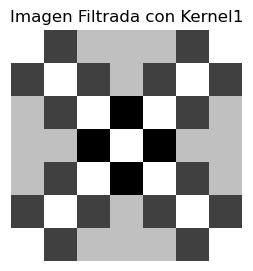

Matriz resultante:
[[ 1. -2.  0.  0.  0. -2.  1.]
 [-2.  1. -2.  0. -2.  1. -2.]
 [ 0. -2.  1. -3.  1. -2.  0.]
 [ 0.  0. -3.  1. -3.  0.  0.]
 [ 0. -2.  1. -3.  1. -2.  0.]
 [-2.  1. -2.  0. -2.  1. -2.]
 [ 1. -2.  0.  0.  0. -2.  1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


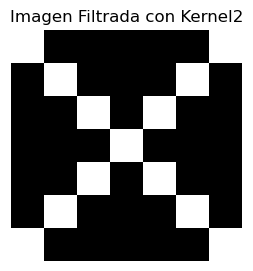

Matriz resultante:
[[1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1.]]


In [109]:

#APLICO KERNEL 1--------------------------
img_array1 = ENTRADA.reshape((1, img_alto, img_ancho, 1))  
filtered_image1 = model1.predict(img_array1)

# Visualizar la imagen resultante
plt.figure(figsize=(3,3))
plt.imshow(filtered_image1.squeeze(), cmap='gray')
plt.title('Imagen Filtrada con Kernel1')
plt.axis('off')
plt.show()
#imprimo matriz resultante
print("Matriz resultante:")
print(filtered_image1.squeeze())

#APLICO KERNEL 2--------------------------
img_array2 = ENTRADA.reshape((1, img_alto, img_ancho, 1))  
filtered_image2 = model2.predict(img_array2)

# Visualizar la imagen resultante
plt.figure(figsize=(3,3))
plt.imshow(filtered_image2.squeeze(), cmap='gray')
plt.title('Imagen Filtrada con Kernel2')
plt.axis('off')
plt.show()
#imprimo matriz resultante
print("Matriz resultante:")
print(filtered_image2.squeeze())

### con stride=2 y stride=3, las imagenes de salida para los distintos filtros es la misma

#### ---------------------------------------------------------------

In [122]:
from keras.models import Sequential
from keras.layers import Conv2D, Input

model=Sequential()
model.add(Input(shape=(32,32,3)))  
model.add(Conv2D(filters=50, kernel_size=3))


model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 50)     │         1,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,400 (5.47 KB)

 Trainable params: 1,400 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

#### ---------------------------------------------------------------

In [135]:
from keras.models import Sequential
from keras.layers import Conv2D, Input
P= 'valid'

model=Sequential()
model.add(Input(shape=(32,32,3)))  
model.add(Conv2D(filters=50, kernel_size=3, padding=P))

model.summary

<bound method Model.summary of <Sequential name=sequential_23, built=True>>